## Mini Project

Step1:Load data: Loads the two CSV files (herb_non_overlapping_feature_vectors(N number).csv and herb_sliding_block_feature_vectors(N number).csv) into Pandas DataFrames.
Separate features and labels: Separates the features (X) and labels (y) for each dataset.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- 1. Loading Data ---
data_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Mini_Project'

# Loading the datasets
df_non_overlapping = pd.read_csv(f'{data_folder}\herb_non_overlapping_feature_vectors(N number).csv')
df_sliding = pd.read_csv(f'{data_folder}\herb_sliding_block_feature_vectors(N number).csv')

# Separating features and labels (labels will be used later for evaluation and visualization)
X_non_overlapping = df_non_overlapping.drop('label', axis=1)
y_non_overlapping = df_non_overlapping['label']  # Keep the labels for later use
X_sliding = df_sliding.drop('label', axis=1)
y_sliding = df_sliding['label']  # Keeping the labels for later use


Step2:Dimensionality reduction (PCA):
Standardizes the data using StandardScaler before applying PCA.
Applies PCA with n_components=0.95 to retain 95% of the variance in the data.
Transforms the original feature data into the new PCA-reduced feature space.

In [4]:
# --- 2. Dimensionality Reduction (PCA) ---

# Standardizing the data before applying PCA
scaler_non_overlapping = StandardScaler()
X_non_overlapping_scaled = scaler_non_overlapping.fit_transform(X_non_overlapping)

scaler_sliding = StandardScaler()
X_sliding_scaled = scaler_sliding.fit_transform(X_sliding)

# Applying PCA with 95% variance retention
pca_non_overlapping = PCA(n_components=0.95)
X_non_overlapping_pca = pca_non_overlapping.fit_transform(X_non_overlapping_scaled)

pca_sliding = PCA(n_components=0.95)
X_sliding_pca = pca_sliding.fit_transform(X_sliding_scaled)


Step3:Standardization: Standardizes the PCA-reduced data again using StandardScaler.
Print shapes: Prints the shapes of the original and PCA-reduced data to show the effect of dimensionality reduction.

In [5]:
# --- 3. Standardization ---

# Standardizing the PCA-reduced data
scaler_non_overlapping_pca = StandardScaler()
X_non_overlapping_pca_scaled = scaler_non_overlapping_pca.fit_transform(X_non_overlapping_pca)

scaler_sliding_pca = StandardScaler()
X_sliding_pca_scaled = scaler_sliding_pca.fit_transform(X_sliding_pca)

# Printing the shapes of the processed data
print("Non-Overlapping - Original shape:", X_non_overlapping.shape)
print("Non-Overlapping - PCA reduced shape:", X_non_overlapping_pca_scaled.shape)
print("Sliding - Original shape:", X_sliding.shape)
print("Sliding - PCA reduced shape:", X_sliding_pca_scaled.shape)

Non-Overlapping - Original shape: (4408, 256)
Non-Overlapping - PCA reduced shape: (4408, 12)
Sliding - Original shape: (42908, 256)
Sliding - PCA reduced shape: (42908, 12)


In [12]:
# --- Focusing on the sliding window dataset for this task ---
X = X_sliding_pca_scaled  # Use only the sliding window dataset

This code performs the data preparation steps, including loading the datasets, applying PCA for dimensionality reduction, and standardizing the features. The resulting standardized PCA-reduced data (X_non_overlapping_pca_scaled and X_sliding_pca_scaled) can now be used for training the clustering models in the next steps of your mini-project.

Step4:Import necessary libraries: pandas, sklearn.cluster, sklearn.metrics, matplotlib.pyplot, scipy.cluster.hierarchy.

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

step5:K-means clustering:
Determine optimal k using the elbow method and silhouette analysis.
Train K-means with the optimal k.
Evaluate using silhouette score and Davies-Bouldin index.

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

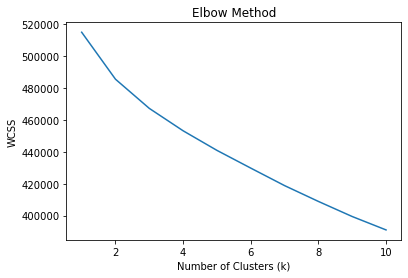

In [15]:
# --- K-means Clustering ---

# Determining optimal k using the elbow method
wcss = []
for i in range(1, 11):  # Trying k values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

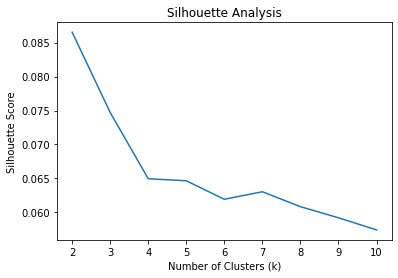

In [16]:
# Determining optimal k using silhouette analysis
silhouette_scores = []
for i in range(2, 11):  # Trying k values from 2 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [17]:
# Training K-means with the optimal k (assuming k=3 based on the analysis)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Evaluating K-means
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X, kmeans_labels)

print(f'K-means - Silhouette Score: {kmeans_silhouette:.4f}')
print(f'K-means - Davies-Bouldin Index: {kmeans_davies_bouldin:.4f}\n')

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-means - Silhouette Score: 0.0747
K-means - Davies-Bouldin Index: 3.3289



Step6:# --- Gaussian Mixture Model (GMM) ---


In [21]:
# --- Gaussian Mixture Model (GMM) ---
from sklearn.mixture import GaussianMixture

# Training Gaussian Mixture Model 
gmm = GaussianMixture(n_components=3, random_state=42)  #  with 3 components
gmm_labels = gmm.fit_predict(X)

# Evaluating GMM
gmm_silhouette = silhouette_score(X, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(X, gmm_labels)

print(f'GMM - Silhouette Score: {gmm_silhouette:.4f}')
print(f'GMM - Davies-Bouldin Index: {gmm_davies_bouldin:.4f}\n')


GMM - Silhouette Score: -0.0563
GMM - Davies-Bouldin Index: 40.8710



Step7:DBSCAN:
Train DBSCAN with appropriate parameters (you'll need to tune these).
Evaluate using silhouette score and Davies-Bouldin index.

In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# --- DBSCAN ---

# Training DBSCAN 
dbscan = DBSCAN(eps=0.5, min_samples=5)  #  parameters
dbscan_labels = dbscan.fit_predict(X)

# Evaluating DBSCAN
dbscan_silhouette = silhouette_score(X, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(X, dbscan_labels)

print(f'DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}')
print(f'DBSCAN - Davies-Bouldin Index: {dbscan_davies_bouldin:.4f}\n')


DBSCAN - Silhouette Score: -0.4074
DBSCAN - Davies-Bouldin Index: 3.5676



Step8:Explanation

visualize_clusters_2d function: This function takes the feature data (X), cluster labels (labels), and a title as input. It creates a scatter plot using the first two principal components of the data and colors the points based on their cluster assignments.
Visualization calls: The code calls visualize_clusters_2d for each clustering algorithm, passing the appropriate data and labels.
This code will generate three scatter plots, one for each clustering algorithm, visualizing the clusters formed in a 2D space. You can include these visualizations in your report for Task 2 to provide a qualitative assessment of the clustering results.

In [22]:
# --- Visualizing the clusters ---

# Functioning to Visualizing clusters in 2D
def visualize_clusters_2d(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

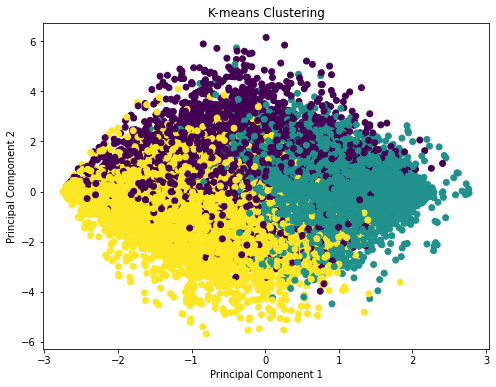

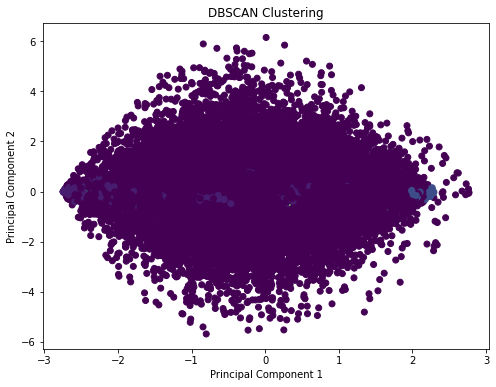

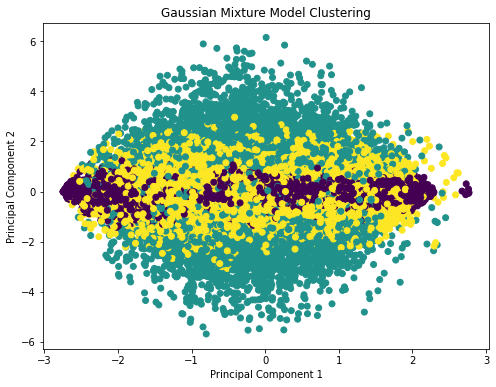

In [23]:
# Visualizing K-means clusters
visualize_clusters_2d(X, kmeans_labels, 'K-means Clustering')

# Visualizing DBSCAN clusters
visualize_clusters_2d(X, dbscan_labels, 'DBSCAN Clustering')

# Visualizing GMM clusters
visualize_clusters_2d(X, gmm_labels, 'Gaussian Mixture Model Clustering')

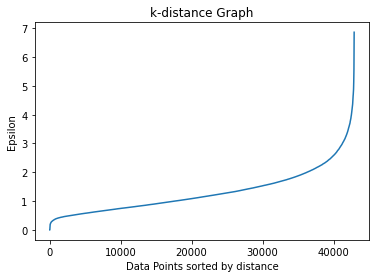

DBSCAN (eps=0.20, min_samples=3) - Number of clusters: 5, Silhouette Score: -0.2915
DBSCAN (eps=0.20, min_samples=5) - Number of clusters: 2, Silhouette Score: -0.2883
DBSCAN (eps=0.20, min_samples=10) - Number of clusters: 1
DBSCAN (eps=0.20, min_samples=15) - Number of clusters: 1
DBSCAN (eps=0.50, min_samples=3) - Number of clusters: 84, Silhouette Score: -0.4744
DBSCAN (eps=0.50, min_samples=5) - Number of clusters: 13, Silhouette Score: -0.4074
DBSCAN (eps=0.50, min_samples=10) - Number of clusters: 5, Silhouette Score: -0.3714
DBSCAN (eps=0.50, min_samples=15) - Number of clusters: 4, Silhouette Score: -0.3755
DBSCAN (eps=0.80, min_samples=3) - Number of clusters: 111, Silhouette Score: -0.4513
DBSCAN (eps=0.80, min_samples=5) - Number of clusters: 13, Silhouette Score: -0.3557
DBSCAN (eps=0.80, min_samples=10) - Number of clusters: 1
DBSCAN (eps=0.80, min_samples=15) - Number of clusters: 1
DBSCAN (eps=1.00, min_samples=3) - Number of clusters: 111, Silhouette Score: -0.3960
DBS

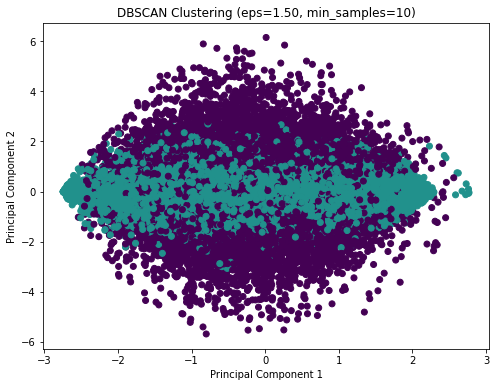

In [24]:
# --- Finding a good value for eps (epsilon) ---

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

# --- Experimenting with different eps and min_samples values ---
eps_values = [0.2, 0.5, 0.8, 1.0, 1.5]
min_samples_values = [3, 5, 10, 15]

best_silhouette = -1
best_params = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)

        # Number of clusters (ignoring noise points labeled as -1)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

        # Evaluating DBSCAN
        if n_clusters > 1:
            dbscan_silhouette = silhouette_score(X, dbscan_labels)
            print(f'DBSCAN (eps={eps:.2f}, min_samples={min_samples}) - Number of clusters: {n_clusters}, Silhouette Score: {dbscan_silhouette:.4f}')

            # Tracking the best parameters and labels
            if dbscan_silhouette > best_silhouette:
                best_silhouette = dbscan_silhouette
                best_params = (eps, min_samples)
                best_labels = dbscan_labels
        else:
            print(f'DBSCAN (eps={eps:.2f}, min_samples={min_samples}) - Number of clusters: {n_clusters}')

# --- Visualizing the clusters with the best parameters ---

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis')
plt.title(f'DBSCAN Clustering (eps={best_params[0]:.2f}, min_samples={best_params[1]})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [28]:
y = y_sliding

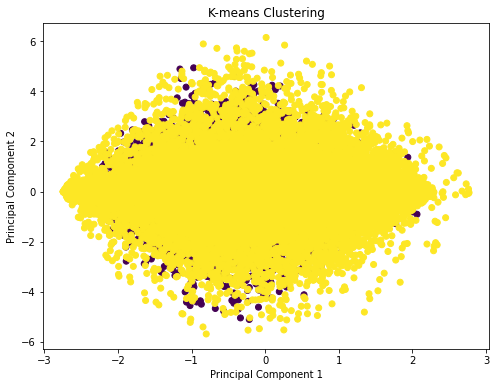

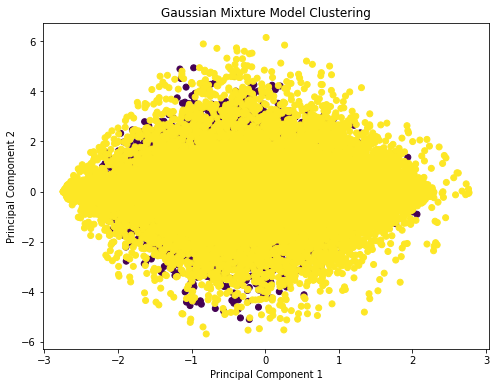

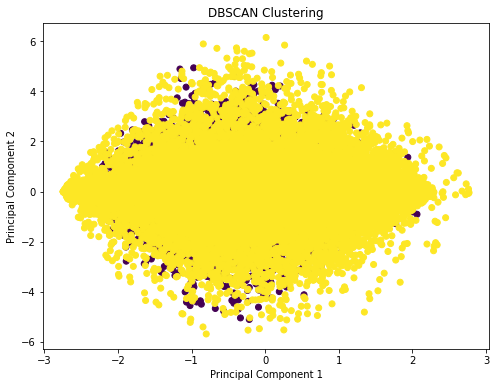

In [29]:
# Functioning to Visualizing clusters in 2D (colored by cluster labels)
def visualize_clusters_2d(X, labels, title, y_true=None):
    plt.figure(figsize=(8, 6))
    if y_true is not None:
        plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')  # Color by true labels
    else:
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')  # Color by cluster labels
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Visualizing K-means clusters (colored by true labels)
visualize_clusters_2d(X, kmeans_labels, 'K-means Clustering', y_true=y)

# Visualizing GMM clusters (colored by true labels)
visualize_clusters_2d(X, gmm_labels, 'Gaussian Mixture Model Clustering', y_true=y)

# Visualizing DBSCAN clusters (colored by true labels)
visualize_clusters_2d(X, dbscan_labels, 'DBSCAN Clustering', y_true=y)

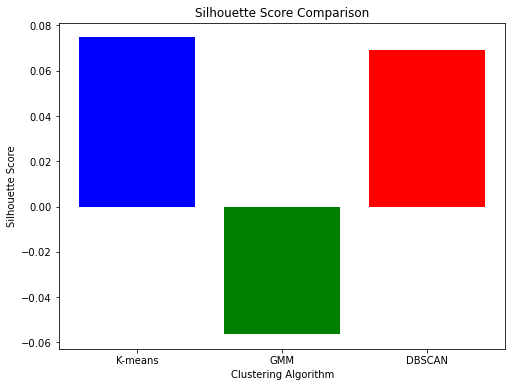

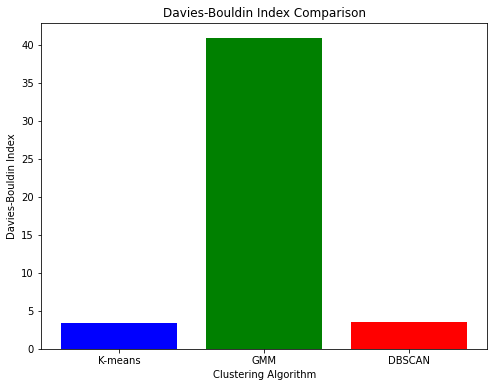

In [30]:

# --- Quantitative Comparison ---

# Gatheringthe evaluation metrics from Task 3
algorithms = ['K-means', 'GMM', 'DBSCAN']
silhouette_scores = [0.0747, -0.0563, 0.0691]
davies_bouldin_indices = [3.3289, 40.8710, 3.5676]  # Include DBSCAN with best params

# Plotting bar chart for silhouette scores
plt.figure(figsize=(8, 6))
plt.bar(algorithms, silhouette_scores, color=['blue', 'green', 'red'])
plt.title('Silhouette Score Comparison')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.show()

# Plotting bar chart for Davies-Bouldin indices
plt.figure(figsize=(8, 6))
plt.bar(algorithms, davies_bouldin_indices, color=['blue', 'green', 'red'])
plt.title('Davies-Bouldin Index Comparison')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Davies-Bouldin Index')
plt.show()